In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from scipy.sparse import hstack
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
%matplotlib inline

//anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('data/winemag-data_first150k.csv')
data.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
data[data.duplicated('description',keep=False)].sort_values('description').head(5)
data = data.drop_duplicates('description')
data = data[pd.notnull(data.price)]
data = data[pd.notnull(data.country)]
data.shape

(89105, 11)

In [75]:
data.describe(include='all')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
count,89105.000000,89105,89105,61481,89105.000000,89105.000000,89105,74587,39294,89105,89105
unique,NaN,46,89105,28342,NaN,NaN,446,1197,18,619,13851
top,NaN,US,Sourced from a small vineyard in the The Rocks...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Pinot Noir,Williams Selyem
freq,NaN,40338,1,1739,NaN,NaN,28672,4112,8318,8801,233
mean,60435.567185,NaN,NaN,NaN,87.868526,33.659514,NaN,NaN,NaN,NaN,NaN
std,40929.391981,NaN,NaN,NaN,3.221974,37.668256,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,25195.000000,NaN,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN,NaN
50%,55995.000000,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN
75%,89648.000000,NaN,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN,NaN,NaN


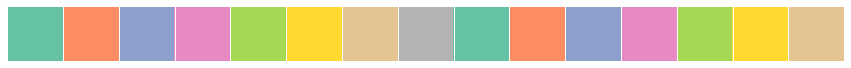

In [30]:
color = sns.palplot(sns.color_palette("Set2", 15))
color

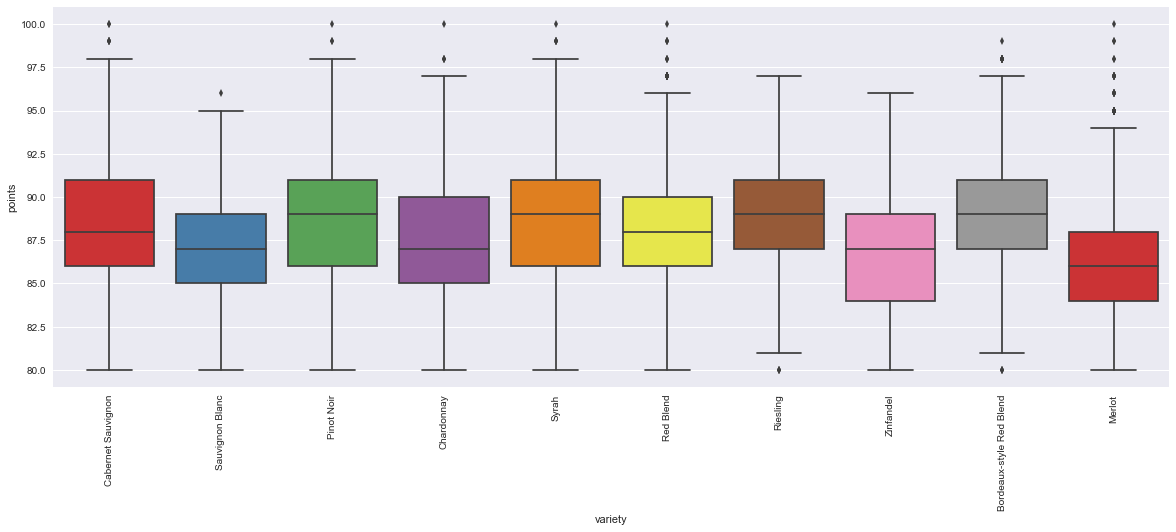

In [70]:
df = data[data.variety.isin(data.variety.value_counts().head(10).index)]

fig, ax = plt.subplots(figsize = (20,7))


chart = sns.boxplot(
    x='variety',
    y='points',
    data=df,
    palette = 'Set1'
)
plt.xticks(rotation = 90)
plt.show()

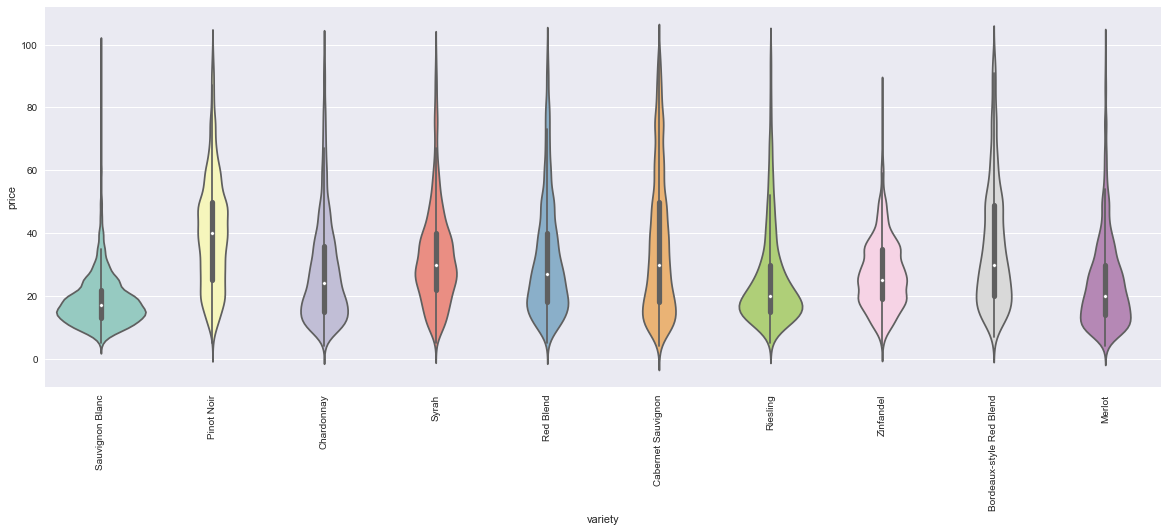

In [79]:
df = data[data.variety.isin(data.variety.value_counts().head(10).index)]
df = df[df['price'] < 100]
fig, ax = plt.subplots(figsize = (20,7))

chart = sns.violinplot(
    x='variety',
    y='price',
    data=df,
    palette = 'Set3'
)
plt.xticks(rotation = 90)
plt.show()

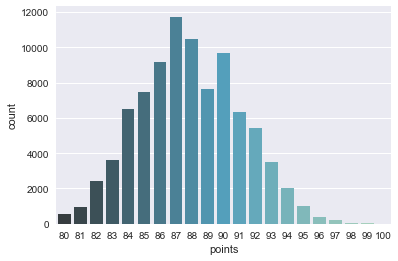

In [42]:
# points
sns.countplot(data['points'], palette = "GnBu_d")

KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

For example, suppose that there was just one wine priced 19.93, but several hundred prices 20.00$. If we were to plot the value counts in a line chart, our line would dip very suddenly down to 1 and then back up to around 1000 again, creating a strangely "jagged" line. The line chart with the same data, shown below for the purposes of comparison, has exactly this problem!

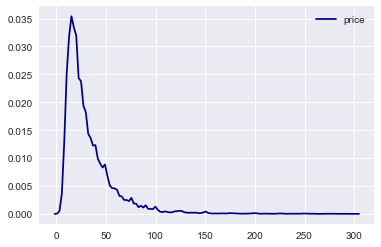

In [51]:
sns.kdeplot(data.query('price < 300').price, color = 'Navy')

('Pearson Correlation:', (0.44728828366731821, 0.0))
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 7.584e+04
Date:                Thu, 03 May 2018   Prob (F-statistic):               0.00
Time:                        12:42:36   Log-Likelihood:            -4.9788e+05
No. Observations:               89105   AIC:                         9.958e+05
Df Residuals:                   89104   BIC:                         9.958e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

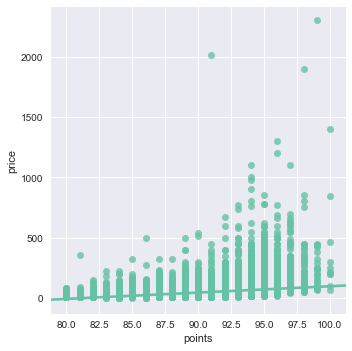

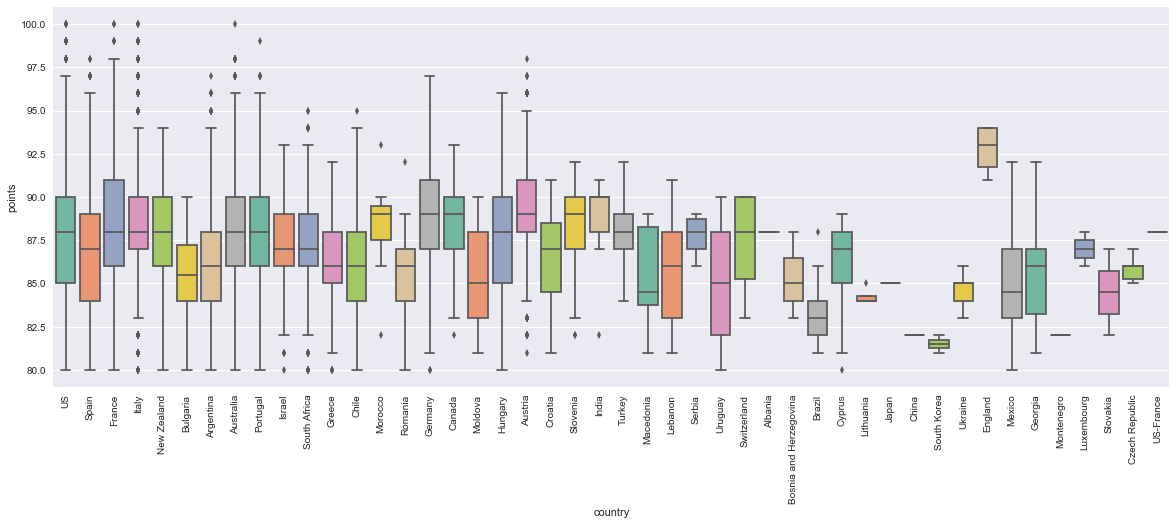

In [31]:
# price and scores
print("Pearson Correlation:", pearsonr(data.price, data.points))
print(sm.OLS(data.points, data.price).fit().summary())
sns.lmplot(y = 'price', x='points', data=data, palette = 'Set1')
fig, ax = plt.subplots(figsize = (20,7))


chart = sns.boxplot(x='country',y='points', data=data, ax = ax, palette="Set2")
plt.xticks(rotation = 90)
plt.show()

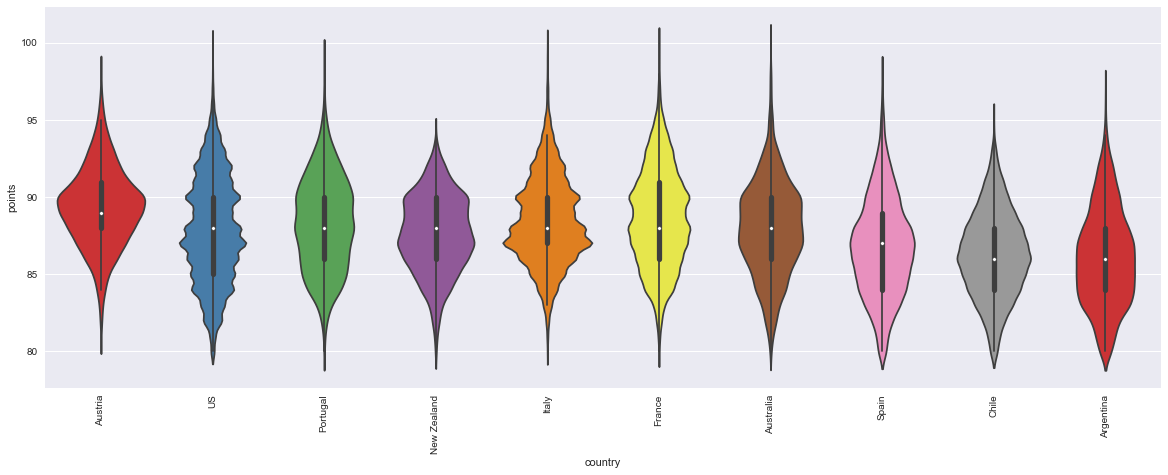

In [88]:
# country
country=data.groupby('country').filter(lambda x: len(x) >1500)
df2 = pd.DataFrame({col:vals['points'] for col,vals in country.groupby('country')})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.violinplot(x='country',y='points', data=country, order=meds.index, ax = ax, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

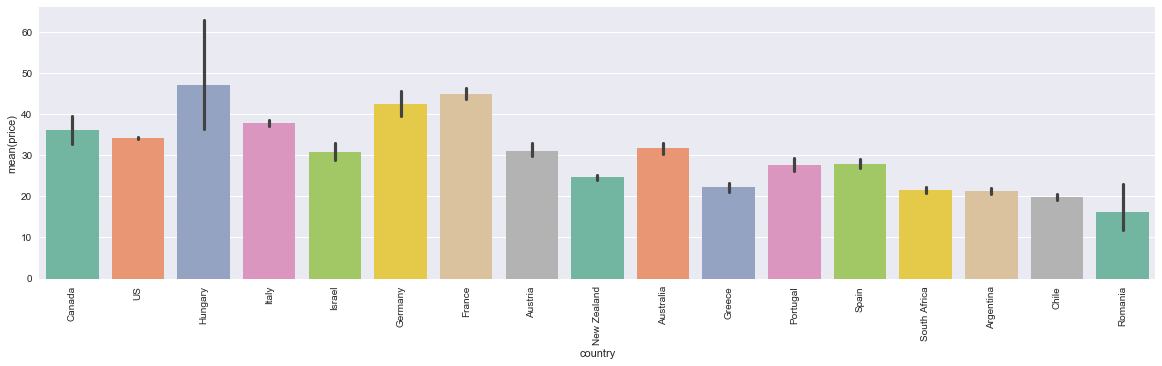

Canada          30.0
US              28.0
Hungary         27.0
Italy           26.0
Israel          25.0
Germany         25.0
France          25.0
Austria         24.0
New Zealand     20.0
Australia       20.0
Greece          18.0
Portugal        17.0
Spain           17.0
South Africa    17.0
Argentina       15.0
Chile           14.0
Romania         10.0
dtype: float64


In [34]:
# means
df3 = pd.DataFrame({col:vals['price'] for col,vals in country.groupby('country')})
meds2 = df3.median()
meds2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,5))
chart = sns.barplot(x='country',y='price', data=country, order=meds2.index, ax = ax, palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

# medians for the above barplot
print(meds2)

In [90]:
# How many classes, how large the support is 
print data.variety.value_counts()

Pinot Noir                       8801
Chardonnay                       8696
Cabernet Sauvignon               8182
Red Blend                        6072
Sauvignon Blanc                  3871
Syrah                            3572
Riesling                         3384
Bordeaux-style Red Blend         3240
Merlot                           3131
Zinfandel                        2403
Malbec                           1910
Sangiovese                       1860
Rosé                             1691
White Blend                      1687
Tempranillo                      1602
Shiraz                           1235
Sparkling Blend                  1212
Portuguese Red                   1153
Rhône-style Red Blend            1015
Nebbiolo                          966
Corvina, Rondinella, Molinara     868
Viognier                          851
Cabernet Franc                    848
Pinot Gris                        833
Pinot Grigio                      804
Champagne Blend                   669
Sangiovese G

0.549340665507


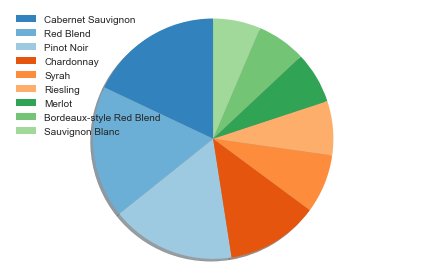

In [125]:
import matplotlib.pyplot as plt

df = data[data.variety.isin(data.variety.value_counts().head(9).index)]
sizes = df.variety.value_counts()
labels = set(df.variety)
print float(len(df))/len(data)
colors =  plt.cm.Vega20c( (4./3*np.arange(20*3/4)).astype(int) )

patches, texts = plt.pie(sizes, colors = colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()
